In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
from tqdm.notebook import tqdm

In [86]:
epsilon = 1e-18

def sieczne(l,p, kryterium):
    iterations=0
    x0 = l
    x1 = p
    while(True):
        iterations += 1
        x = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        if f(x) is None or f(x1) is None or x < l  or x > p:
            return None, iterations
        x1, x0 = x, x1
        if abs(f(x)) < epsilon:
            break
    return x, iterations

def newton(l,p,kryterium):
    iterations = 0
    x = (l + p)/2
    while(abs(f(x)) > epsilon):
        iterations += 1
        prev,x = x,x - f(x)/fp(x)
        if f(x) is None or fp(x) is None or x < l or x > p:
            return None, iterations
        if (kryterium and abs(f(x)) < epsilon) or (not kryterium and abs(x - prev) < epsilon):
            break
    return x,iterations

In [87]:
def czeb(k): # od 0 do 1
    return [(math.cos((2*j -1)/(2*k) * math.pi) + 1)/2 for j in range(1,k+1)]

In [88]:
def reg(k): # k rowno od 0 do 1
    return [x/(k - 1) for x in range(k)]

In [89]:
def scale(T,l,p): # z [o,1] a [l,p]
    return [x * (p-l) + l for x in T]

In [90]:
def f(x):
    n=10
    m=15
    if x < -1.2 or x > 0.8:
        return None
    return x**n * (1 - x)**m

def fp(x):
    if x < -2*math.pi or x > math.pi:
        return None
    return -5*x**9 * (5*x - 2) * (1 - x) ** 14

In [91]:
def diff(Y_1,Y_2):
    diff=0
    for i in range(len(Y_2)):
        diff = max(diff,abs(Y_1[i]-Y_2[i]))
    return diff

def error(Y_1,Y_2):
    error = 0
    for i in range(len(Y_2)):
        error += (Y_1[i] - Y_2[i]) ** 2
    return error/len(Y_1)

In [95]:
points = 100
n = 3000

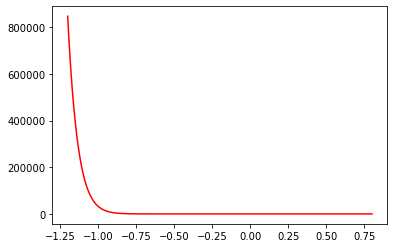

In [96]:
f_X = scale(reg(n),-1.2,0.8)
f_Y = [f(x) for x in f_X]

plt.plot(f_X,f_Y,'r-')

average iteration number:1.0
ilośc znalezionych miejsc zerowych:0
[]


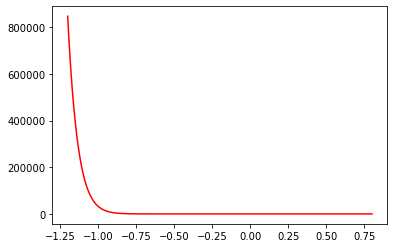

In [100]:
X = scale(reg(points), -1.2, 0.8)
wyn = []
iterationsSum = 0
kryterium = True
for i in range(len(X) - 1):
    temp = sieczne(X[i],X[i+1],kryterium)
    if temp[0] is not None:
        wyn += [temp[0]]
    iterationsSum += temp[1]

X = [x for x in set(wyn)]
        
Y = [f(x) for x in X]
plt.plot(f_X,f_Y,'r-')
plt.plot(X,Y,'o')
print("average iteration number:", end="")
print(iterationsSum/(points - 1))
print("ilośc znalezionych miejsc zerowych:", end="")
print(len(X))
print(X)

average iteration number:1.121212121212121
ilośc znalezionych miejsc zerowych:3
[-0.014808766809824372, 0.002020202020202033, 0.016029963100831462]


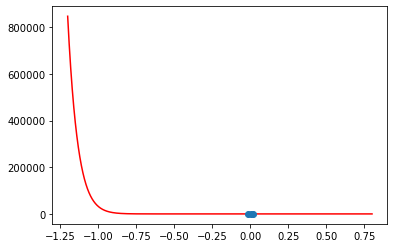

In [98]:
X = scale(reg(points), -1.2, 0.8)
wyn = []
iterationsSum = 0
kryterium = True
for i in range(len(X) - 1):
    temp = newton(X[i],X[i+1],kryterium)
    if(temp[0] is not None and abs(f(temp[0])) < epsilon):
        wyn += [temp[0]]
    iterationsSum += temp[1]
        
X = [x for x in set(wyn)]
        
Y = [f(x) for x in X]
plt.plot(f_X,f_Y,'r-')
plt.plot(X,Y,'o')
print("average iteration number:", end="")
print(iterationsSum/(points - 1))
print("ilośc znalezionych miejsc zerowych:", end="")
print(len(X))
print(X)